IMPORT NECESSARY LIBRARIES

In [20]:
#IMPORT THE LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

LOADING THE DATASET

In [21]:
df=pd.read_csv('mental_health_dataset.csv')

In [22]:
df.head()

,User_ID,Age,Gender,Occupation,Country,Mental_Health_Condition,Severity,Consultation_History,Stress_Level,Sleep_Hours,Work_Hours,Physical_Activity_Hours
0,1,36,Non-binary,Sales,Canada,No,Medium,Yes,Medium,7.1,46,5
1,2,34,Female,Education,UK,Yes,NaN,No,Low,7.5,47,8
2,3,65,Non-binary,Sales,USA,Yes,High,No,Low,8.4,58,10
3,4,34,Male,Other,Australia,No,Low,No,Medium,9.8,30,2
4,5,22,Female,Healthcare,Canada,Yes,Low,No,Medium,4.9,62,5


DATA CLEANING AND PREPROCESSING

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   User_ID                  1000 non-null   int64  
 1   Age                      1000 non-null   int64  
 2   Gender                   1000 non-null   object 
 3   Occupation               1000 non-null   object 
 4   Country                  1000 non-null   object 
 5   Mental_Health_Condition  1000 non-null   object 
 6   Severity                 499 non-null    object 
 7   Consultation_History     1000 non-null   object 
 8   Stress_Level             1000 non-null   object 
 9   Sleep_Hours              1000 non-null   float64
 10  Work_Hours               1000 non-null   int64  
 11  Physical_Activity_Hours  1000 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 93.9+ KB


In [24]:
df.shape

(1000, 12)

In [25]:
df.describe()

,User_ID,Age,Sleep_Hours,Work_Hours,Physical_Activity_Hours
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.89200,7.095600,54.621000,5.134000
std,288.819436,13.97475,1.713861,14.709035,3.081808
min,1.000000,18.00000,4.000000,30.000000,0.000000
25%,250.750000,30.00000,5.600000,42.000000,3.000000
50%,500.500000,42.00000,7.100000,55.000000,5.000000
75%,750.250000,54.00000,8.500000,67.000000,8.000000
max,1000.000000,65.00000,10.000000,80.000000,10.000000


In [26]:
df.dtypes

User_ID                      int64
Age                          int64
Gender                      object
Occupation                  object
Country                     object
Mental_Health_Condition     object
Severity                    object
Consultation_History        object
Stress_Level                object
Sleep_Hours                float64
Work_Hours                   int64
Physical_Activity_Hours      int64
dtype: object

In [27]:
df.isnull().sum()

User_ID                      0
Age                          0
Gender                       0
Occupation                   0
Country                      0
Mental_Health_Condition      0
Severity                   501
Consultation_History         0
Stress_Level                 0
Sleep_Hours                  0
Work_Hours                   0
Physical_Activity_Hours      0
dtype: int64

In [28]:
df_filled_0 = df.fillna(0)
print(df_filled_0)

     User_ID  Age             Gender  Occupation    Country  \
0          1   36         Non-binary       Sales     Canada   
1          2   34             Female   Education         UK   
2          3   65         Non-binary       Sales        USA   
3          4   34               Male       Other  Australia   
4          5   22             Female  Healthcare     Canada   
..       ...  ...                ...         ...        ...   
995      996   46         Non-binary       Other    Germany   
996      997   31               Male       Sales     Canada   
997      998   33             Female          IT    Germany   
998      999   42             Female     Finance  Australia   
999     1000   43  Prefer not to say       Sales    Germany   

    Mental_Health_Condition Severity Consultation_History Stress_Level  \
0                        No   Medium                  Yes       Medium   
1                       Yes        0                   No          Low   
2                    

FINDING THE MISSING AND DUPLICATE DATA

In [29]:
df.isnull().sum()

User_ID                      0
Age                          0
Gender                       0
Occupation                   0
Country                      0
Mental_Health_Condition      0
Severity                   501
Consultation_History         0
Stress_Level                 0
Sleep_Hours                  0
Work_Hours                   0
Physical_Activity_Hours      0
dtype: int64

In [30]:
df.duplicated().sum()

0

EDA

In [31]:
df.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
User_ID,1000.0,500.5000,288.819436,1.0,250.75,500.5,750.25,1000.0
Age,1000.0,41.8920,13.974750,18.0,30.00,42.0,54.00,65.0
Sleep_Hours,1000.0,7.0956,1.713861,4.0,5.60,7.1,8.50,10.0
Work_Hours,1000.0,54.6210,14.709035,30.0,42.00,55.0,67.00,80.0
Physical_Activity_Hours,1000.0,5.1340,3.081808,0.0,3.00,5.0,8.00,10.0


PAIRPLOT OF NUMERICAL DATA

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


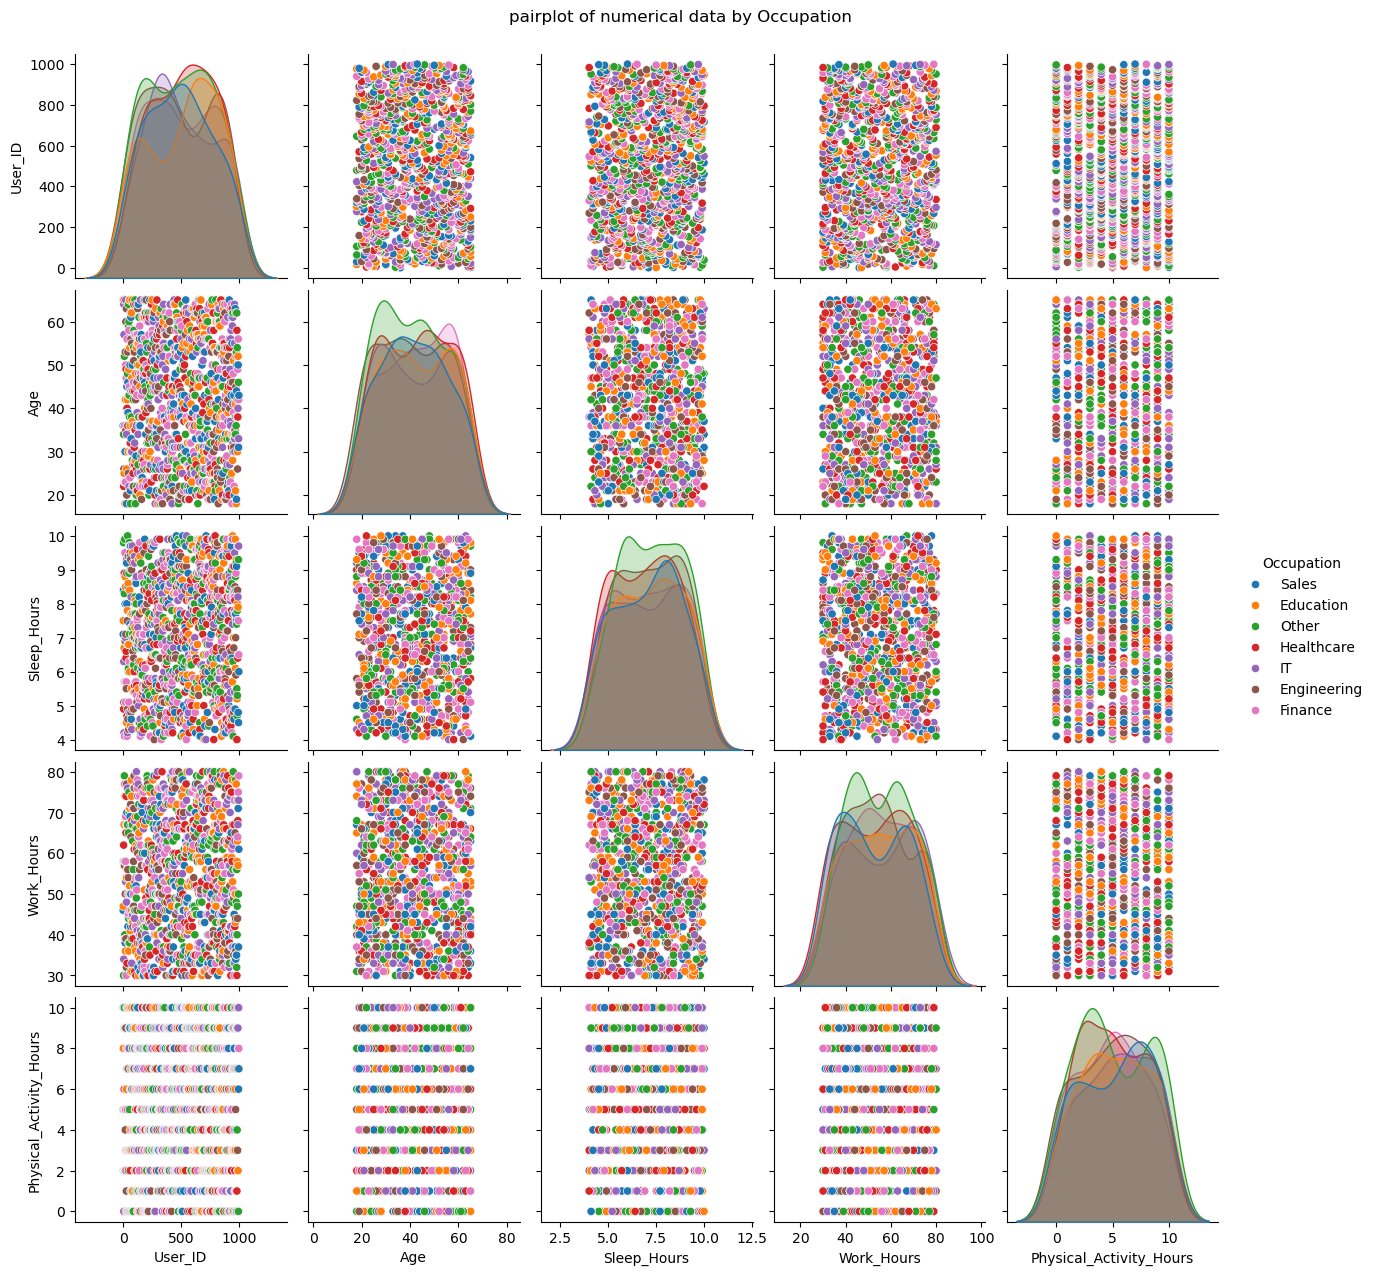

In [32]:
sns.pairplot(df,hue='Occupation')
plt.suptitle('pairplot of numerical data by Occupation',y=1.02)
plt.show()

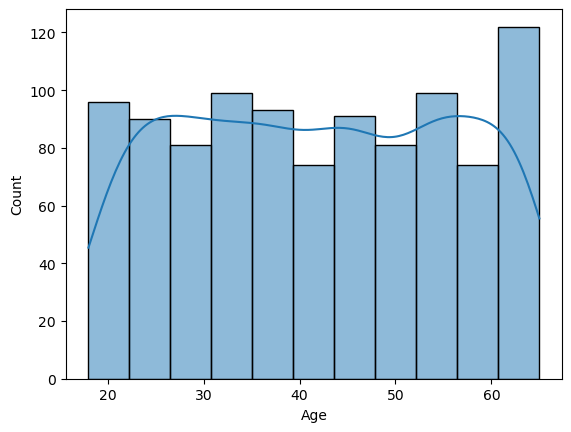

In [33]:
#distribution of numerical columns
sns.histplot(df['Age'], kde=True)  #kde is kernal density estimate overlay
plt.show()

AGE vs SLEEP HOURS

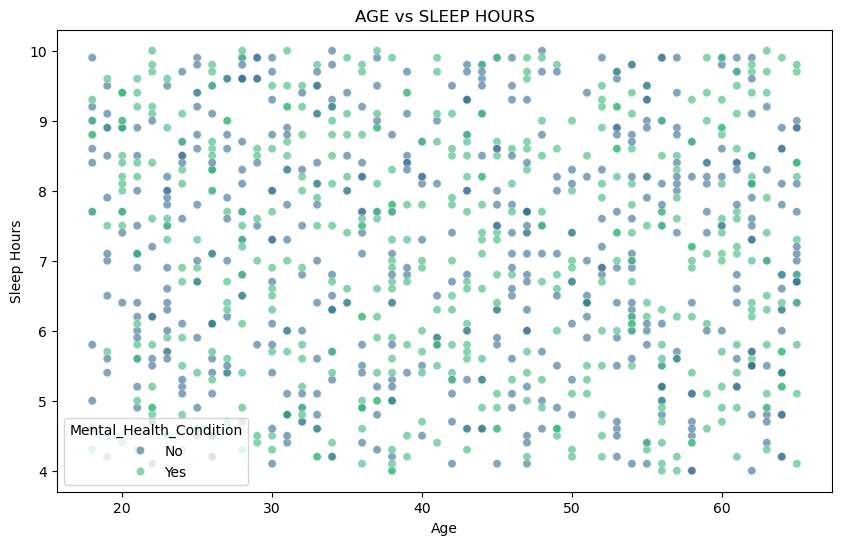

In [49]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,
                x='Age' ,
                y='Sleep_Hours',
                hue= 'Mental_Health_Condition',
                alpha=0.6,
                palette="viridis")
plt.title("AGE vs SLEEP HOURS")
plt.xlabel("Age")
plt.ylabel("Sleep Hours")            
plt.show()

DISTRIBUTION OF NUMERICAL FEATURES

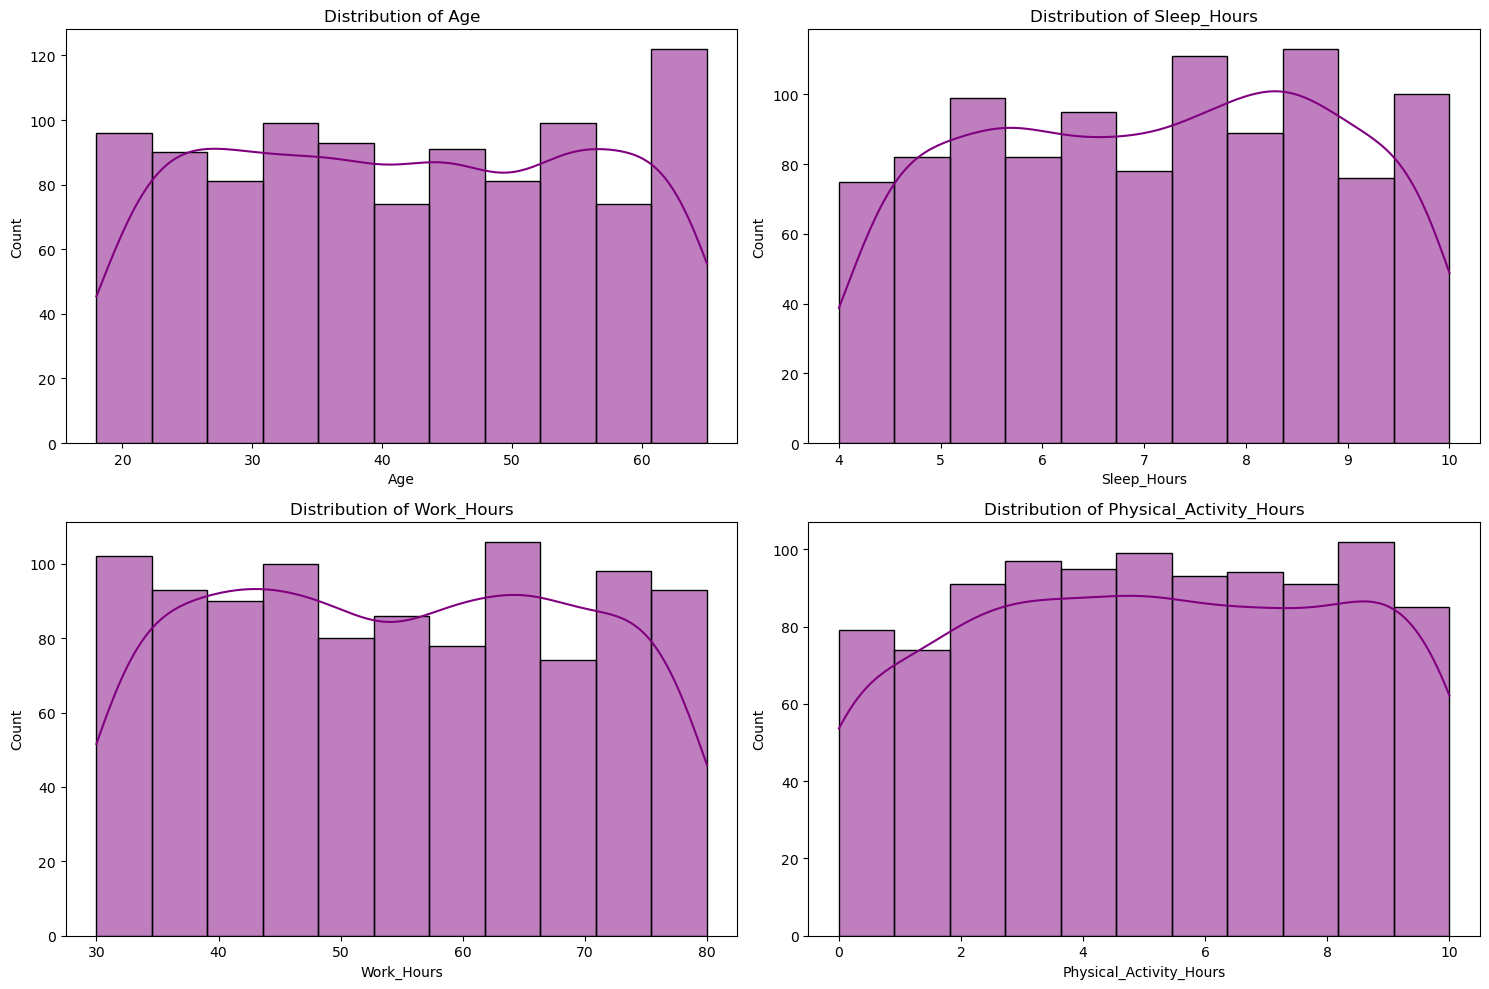

In [39]:
plt.figure(figsize = (15, 10)) #figure size 
numeric_cols = ['Age', 'Sleep_Hours','Work_Hours','Physical_Activity_Hours'] #contains column names to visualize
for i, col in enumerate(numeric_cols): #iterates over column names and their indices (i)
    plt.subplot(2, 2, i + 1) # create 2 x 2 grid position each plot in next slot
    sns.histplot(df[col], kde = True, color = 'purple') 
    plt.title(f'Distribution of {col}')
plt.tight_layout() #adjusts subplots and prevent from overlapping
plt.show()

DISTRIBUTION OF CATEGORICAL FEATURES

C:\Users\hp\AppData\Local\Temp\ipykernel_23384\1457152471.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df, x=col,palette = "coolwarm")
C:\Users\hp\AppData\Local\Temp\ipykernel_23384\1457152471.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df, x=col,palette = "coolwarm")
C:\Users\hp\AppData\Local\Temp\ipykernel_23384\1457152471.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df, x=col,palette = "coolwarm")
C:\Users\hp\AppData\Local\Temp\ipykernel_23384\1457152471.py:5: FutureWarning: 

Passing `palette

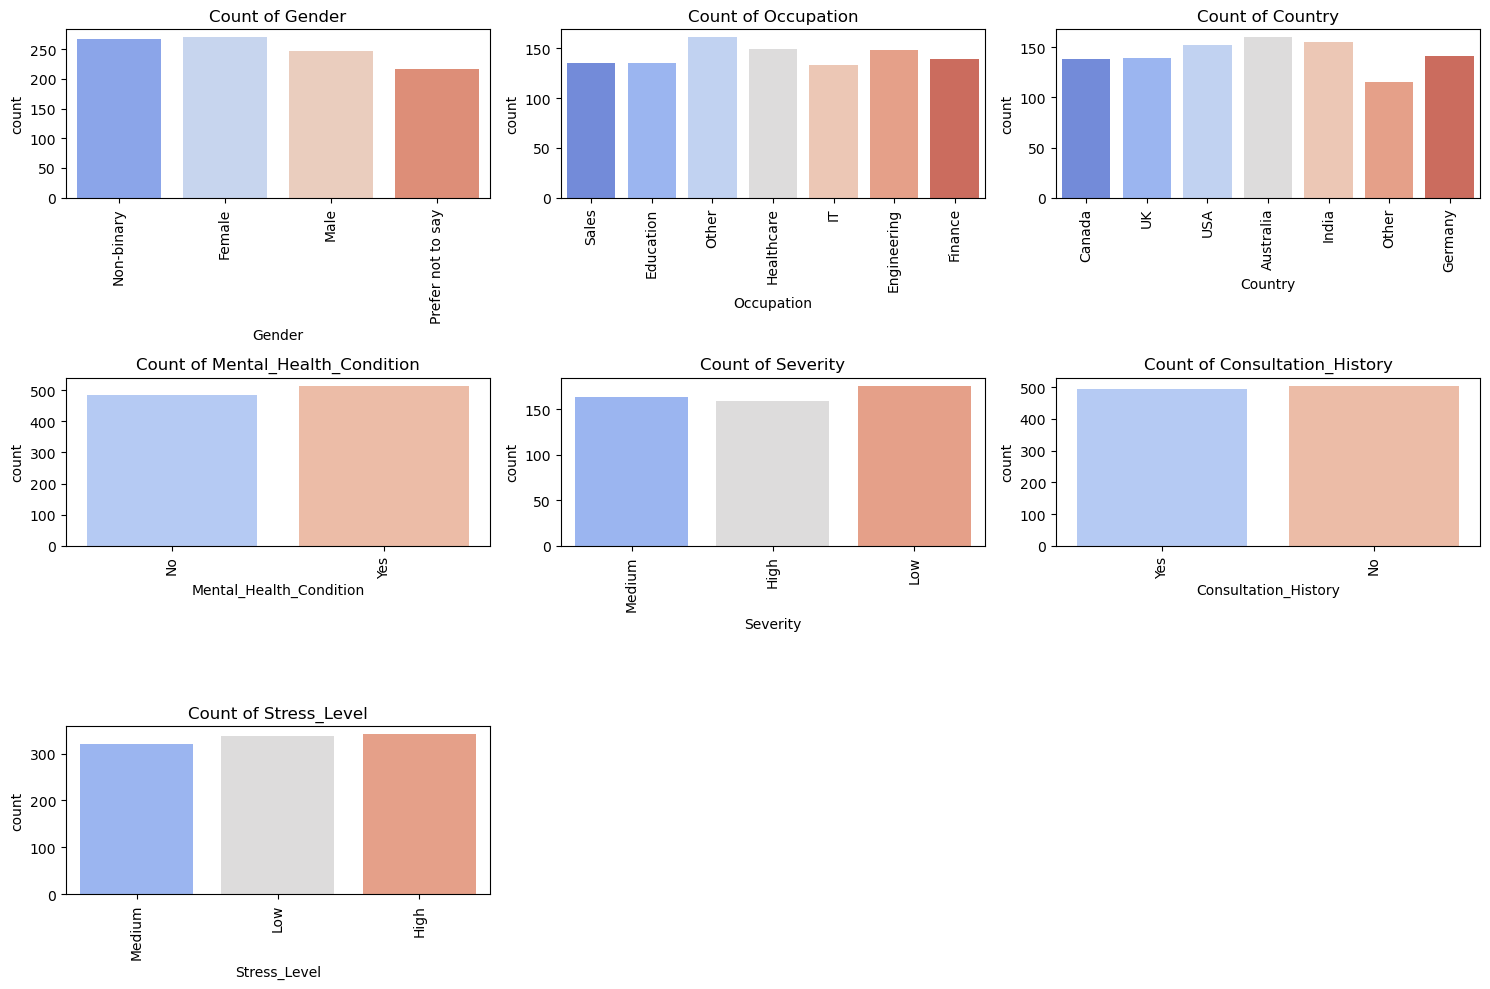

In [44]:
plt.figure(figsize = (15, 10)) #figure size 
categorical_cols = ['Gender', 'Occupation','Country','Mental_Health_Condition','Severity','Consultation_History', 'Stress_Level'] #contains column names to visualize
for i, col in enumerate(categorical_cols): #iterates over column names and their indices (i)
    plt.subplot(3, 3, i + 1) # create 2 x 2 grid position each plot in next slot
    sns.countplot(data= df, x=col,palette = "coolwarm")
    plt.title(f'Count of {col}')
    plt.xticks(rotation=90)
plt.tight_layout() #adjusts subplots and prevent from overlapping
plt.show()

SLEEP HOURS BY STRESS LEVEL

C:\Users\hp\AppData\Local\Temp\ipykernel_23384\2517579878.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,


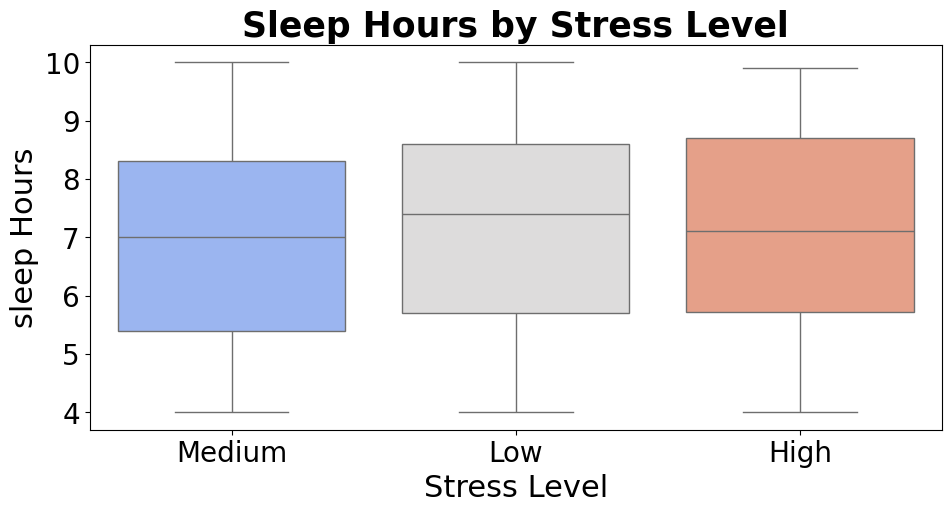

In [53]:
plt.figure(figsize = (11,5))
sns.boxplot(data=df,
           x = 'Stress_Level',
           y ='Sleep_Hours',
           palette="coolwarm")
plt.title("Sleep Hours by Stress Level", fontsize=25, fontweight='bold')
plt.xlabel("Stress Level", fontsize = 22)
plt.ylabel("sleep Hours", fontsize = 22)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

WORK HOURS BY MENTAL HEALTH CONDITION AND GENDER

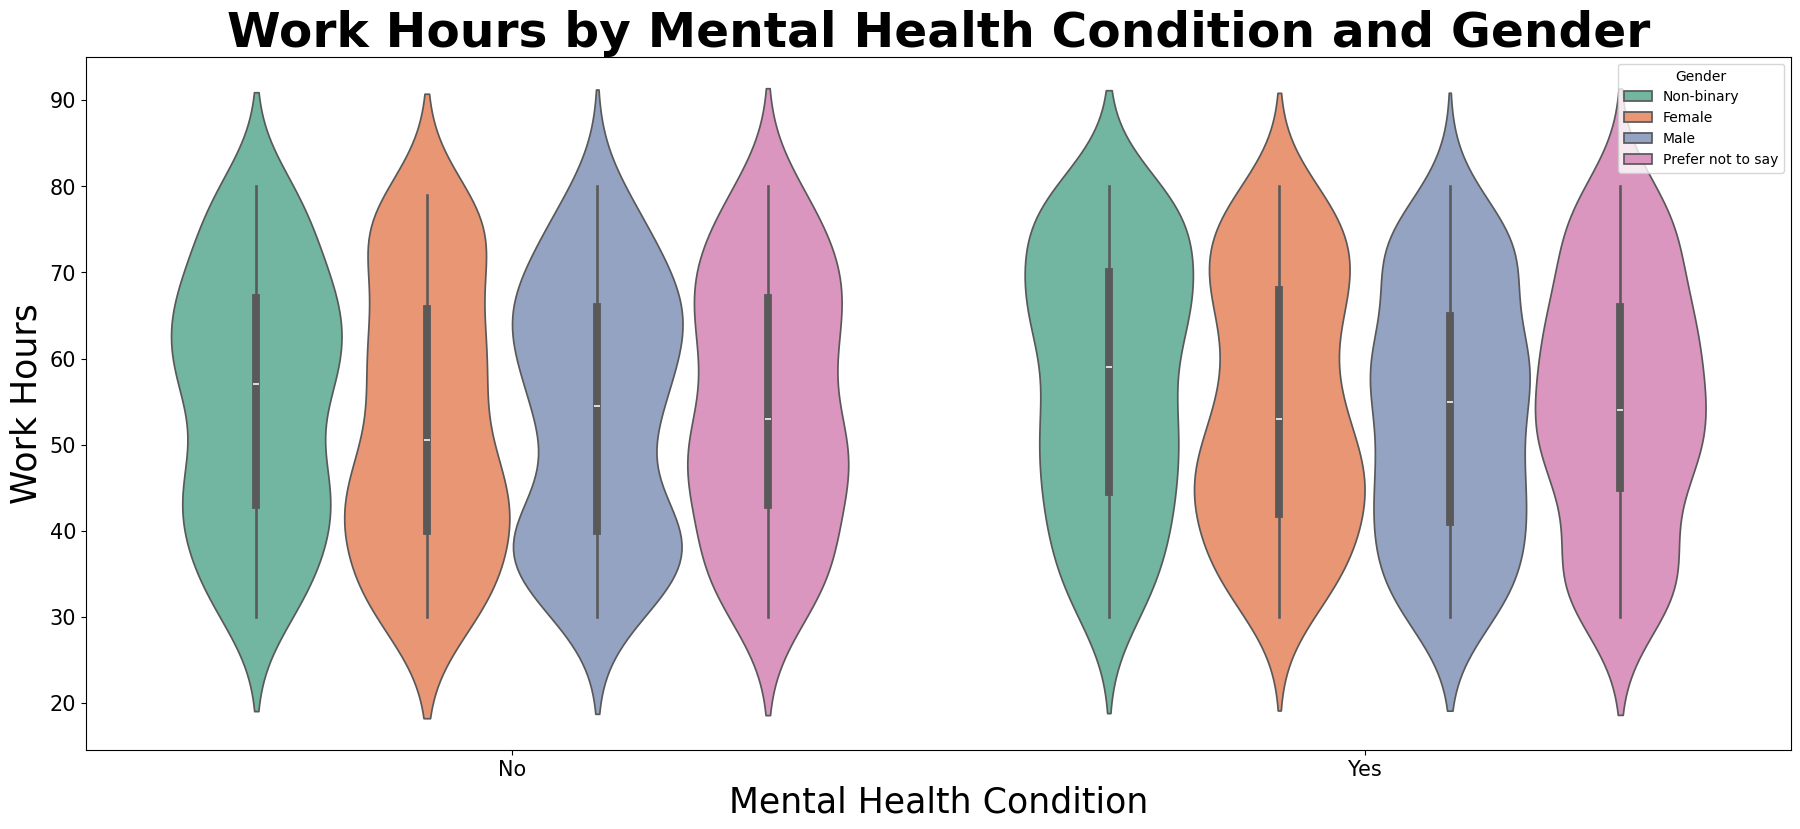

In [58]:
plt.figure(figsize= (22,9))
sns.violinplot(data=df,
              x='Mental_Health_Condition',
              y='Work_Hours',
              hue='Gender',
              palette="Set2")
plt.title("Work Hours by Mental Health Condition and Gender",fontsize=35,fontweight='bold')
plt.xlabel("Mental Health Condition", fontsize =25)
plt.ylabel("Work Hours", fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

PHYSICAL ACTIVITY HOURS BY STRESS LEVEL

C:\Users\hp\AppData\Local\Temp\ipykernel_23384\2686407813.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,


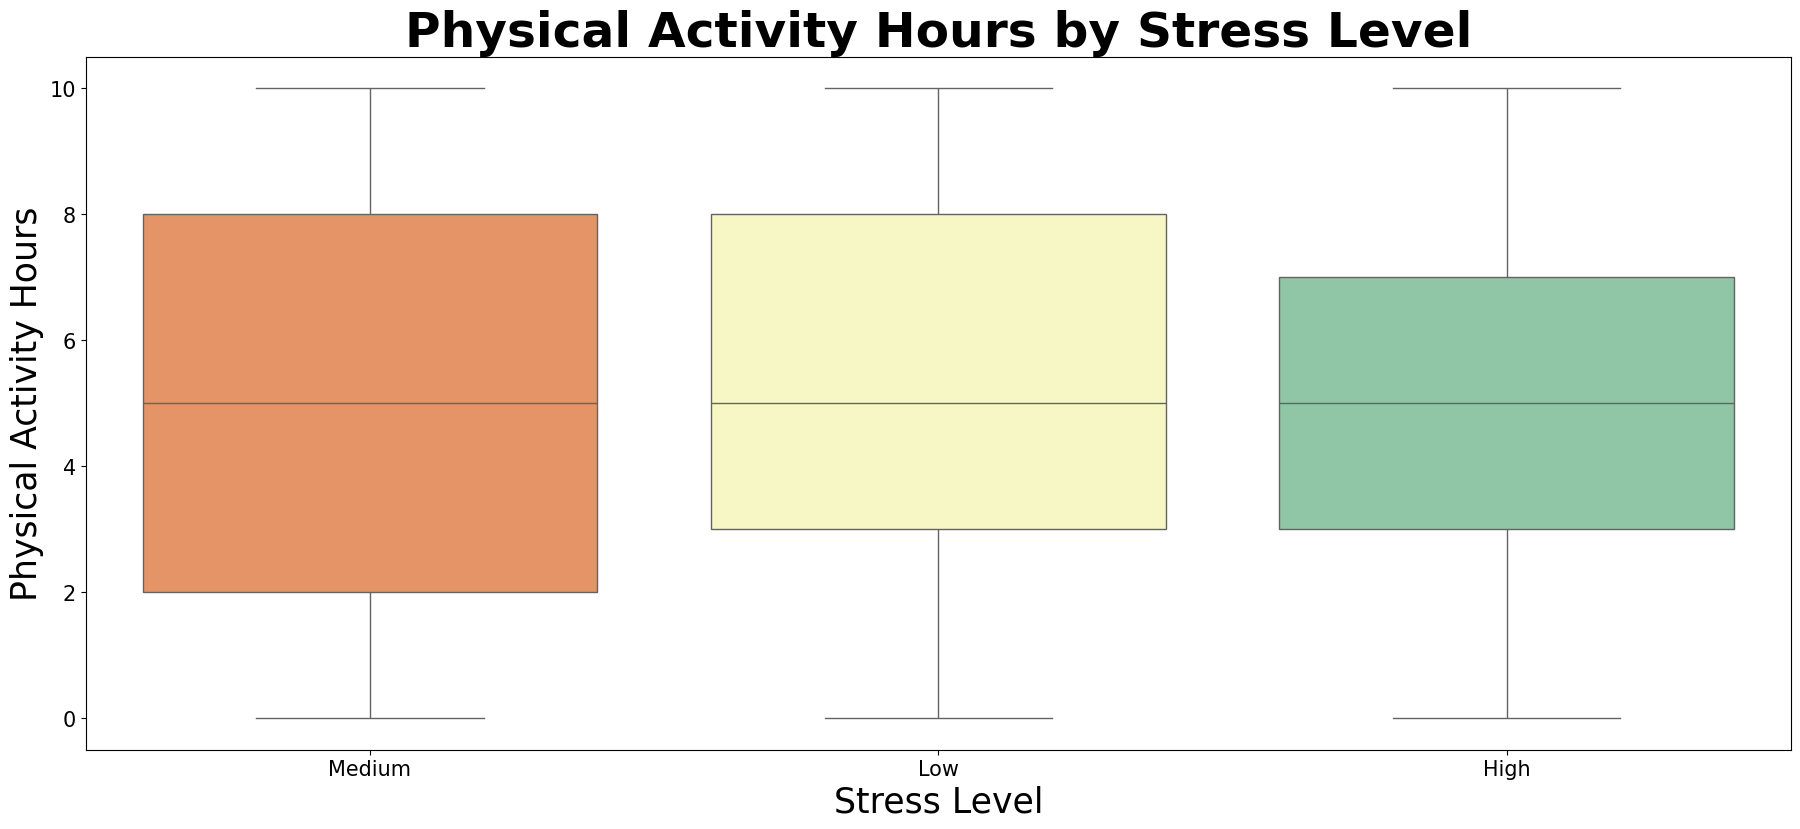

In [59]:
plt.figure(figsize= (22,9))
sns.boxplot(data=df,
              x='Stress_Level',
              y='Physical_Activity_Hours',
              palette="Spectral")
plt.title("Physical Activity Hours by Stress Level",fontsize=35,fontweight='bold')
plt.xlabel("Stress Level", fontsize =25)
plt.ylabel("Physical Activity Hours", fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

MENTAL HEALTH CONDITION BY COUNTRY

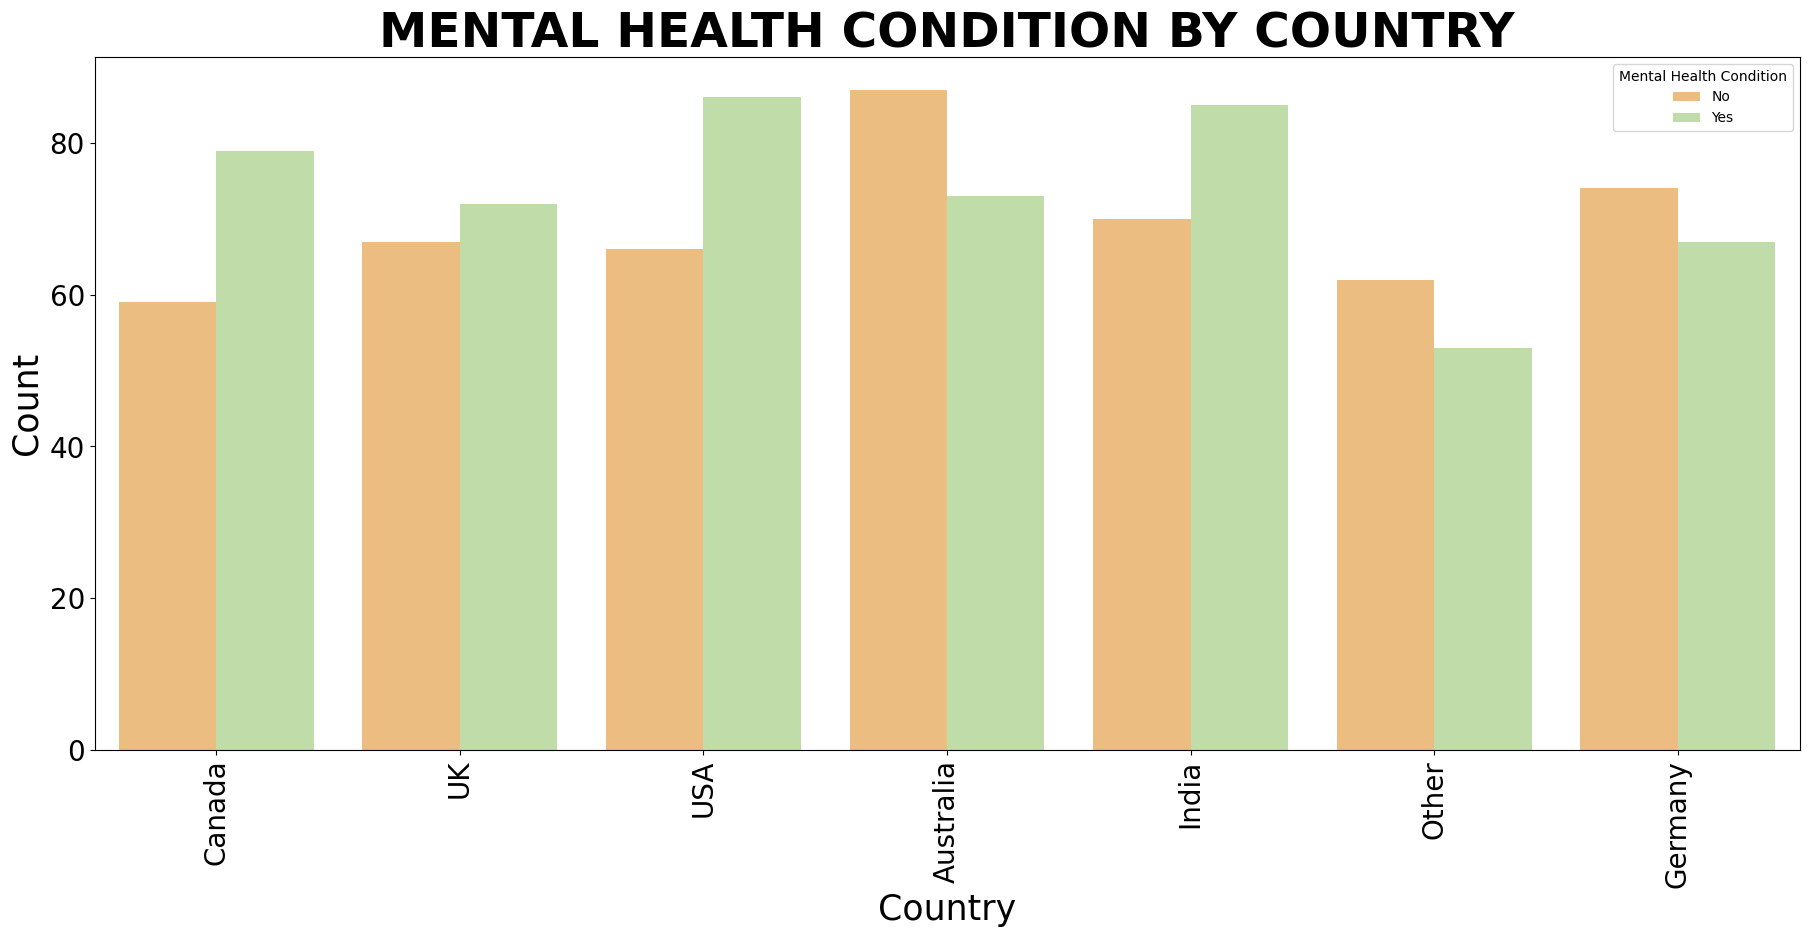

In [67]:
plt.figure(figsize=(22,9))
sns.countplot(data =df,
             x= 'Country',
             hue= 'Mental_Health_Condition',
             palette="Spectral")
plt.title("MENTAL HEALTH CONDITION BY COUNTRY", fontweight='bold', fontsize= 35)
plt.xlabel("Country", fontsize=25)
plt.ylabel("Count", fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(title = "Mental Health Condition")
plt.xticks(rotation = 90)
plt.show()

CORRELATION MATRIX OF NUMERICAL VARIABLES

<function matplotlib.pyplot.show(close=None, block=None)>

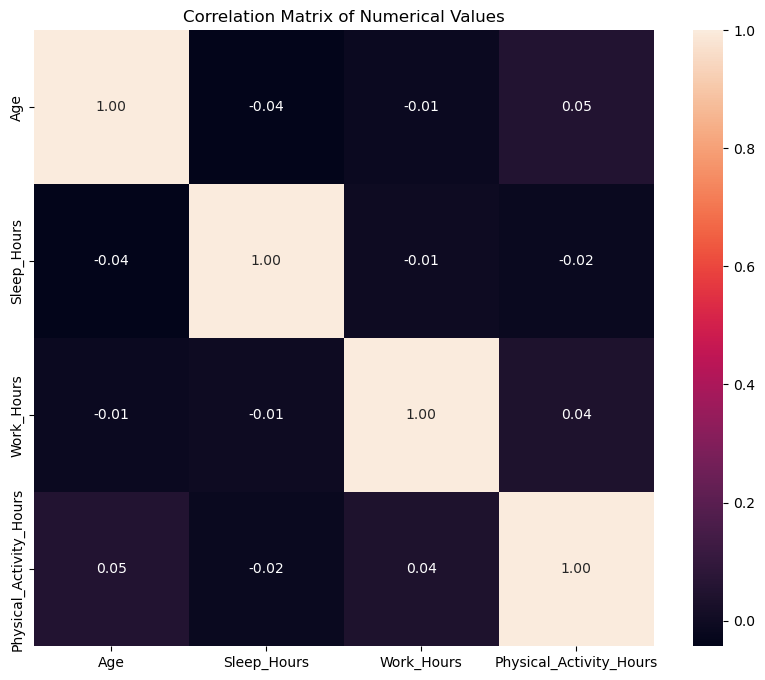

In [74]:
plt.figure(figsize=(10,8))
sns.heatmap(df[['Age','Sleep_Hours','Work_Hours',
               'Physical_Activity_Hours']].corr(),annot=True,fmt=".2f")
plt.title("Correlation Matrix of Numerical Values")
plt.show

LOGISTIC REGRESSION

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [79]:
X= df.drop(columns=['User_ID','Mental_Health_Condition'])
y= df['Mental_Health_Condition']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46) 

In [85]:
preprocessor= ColumnTransformer(
    transformers=[
        ('num', StandardScaler(),['Age','Sleep_Hours','Work_Hours','Physical_Activity_Hours']),
        ('cat', OneHotEncoder(),['Gender','Occupation','Country','Consultation_History','Stress_Level'])
    ])

In [88]:
pipeline= Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('classifier',LogisticRegression())
])

In [89]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Sleep_Hours',
                                                   'Work_Hours',
                                                   'Physical_Activity_Hours']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Gender', 'Occupation',
                                                   'Country',
                                                   'Consultation_History',
                                                   'Stress_Level'])])),
                ('classifier', LogisticRegression())])

In [91]:
y_pred= pipeline.predict(X_test)

In [92]:
print("Accuracy:",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.52
              precision    recall  f1-score   support

          No       0.49      0.46      0.47        94
         Yes       0.54      0.58      0.56       106

    accuracy                           0.52       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.52      0.52      0.52       200

